In [36]:
import tkinter as tk
from tkinter import filedialog, messagebox, simpledialog
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import threading
import numpy as np
import os
import random

In [37]:
class Planeta:
    """
    Se define la clase Planeta, la cual contiene las siguientes instancias:
    - _nombre: Nombre del planeta (atributo protegido).
    - _anfitriona: Nombre de la estrella anfitriona del planeta (atributo protegido).
    - _masa_planeta: Masa del planeta (atributo protegido).
    - _radio_planeta: Radio del planeta (atributo protegido).
    - _a: Semieje mayor de la órbita del planeta (atributo protegido).
    - _i: Inclinación de la órbita del planeta (atributo protegido).
    - _e: Excentricidad de la órbita del planeta (atributo protegido).
    - _w: Argumento del periastron de la órbita del planeta (atributo protegido).
    - _masa_estrella: Masa de la estrella anfitriona del planeta (atributo protegido).
    - _temperatura_superficial: Temperatura superficial del planeta (atributo protegido).
    - _temp_calculated: Temperatura calculada (atributo protegido).
    """
    def __init__(self, nombre, anfitriona, masa_planeta, radio_planeta, a, i, e, w, masa_estrella, temp_calculated):
        self.nombre = nombre
        self.anfitriona = anfitriona # la estrella anfitriona.
        self.masa_planeta = masa_planeta
        self.radio_planeta = radio_planeta
        self.a = a # semieje mayor
        self.i = i # inclinación de la órbita
        self.e = e # excentricidad
        self.w = w # periastron
        self.masa_estrella = masa_estrella
        self.temp_calculated = temp_calculated

    def periodo_orbital(self):
        """
        Calcula el período orbital del planeta con la fórmula 2*pi*sqrt(a^3/(G*M)),
        donde a es el semieje mayor de la órbita del planeta, G es la constante de
        gravitación universal y M es la masa de la estrella anfitriona.
        """
        G = 6.67430e-11 # Constante de gravitación universal en m^3 kg^-1 s^-2
        return float(2 * np.pi * np.sqrt((self.a ** 3) / (G * self.masa_estrella)))
    
    def calcular_K(self, P):
        """
        Calcula la semiamplitud K de la velocidad radial.
        """
        G = 6.67430e-11
        return ((2 * np.pi * G / P) ** (1/3)) * (self.masa_planeta / (self.masa_estrella + self.masa_planeta) ** (2/3))

    def velocidad_radial(self, t, P, K):
        if P != 0 and K != 0:
            return K * (np.sin(2 * np.pi * t / P + self.w) + self.e * np.sin(self.w)) / (1 + self.e * np.cos(2 * np.pi * t / P + self.w))
        else:
            return 0

    def graficar_velocidad_radial(self):
        """
        Genera y grafica la velocidad radial del planeta.
        """
        # Calcular el período orbital en segundos
        P = self.periodo_orbital()

        # Calcular K
        K = self.calcular_K(P)

        # Generar datos de tiempo y calcular la velocidad radial
        time_days = np.linspace(0, P / (24 * 3600), 100)
        time_seconds = time_days * 24 * 3600
        velocity_radial = self.velocidad_radial(time_seconds, P, K)

        # Graficar
        plt.plot(time_days, velocity_radial)
        plt.xlabel('Tiempo (días)')
        plt.ylabel('Velocidad Radial (m/s)')
        plt.title(f'Velocidad Radial del Exoplaneta {self.nombre}')
        plt.show()


In [38]:
def metodo_descubrimiento(self, metodo):
    self.metodo_descubrimiento = metodo

    if self.metodo_descubrimiento == "Primary Transit":
        if self.anfitriona.radio == 0:
            self.metodo_descubrimiento = "Por Tránsito, pero falta información para calcular el parámetro de impacto b."
            return self.metodo_descubrimiento
        else:
            # Aquí creamos una instancia de Planeta con todos los argumentos necesarios, incluido masa_estrella
            planeta = Planeta(
                nombre=self.nombre,
                anfitriona=self.anfitriona,
                masa_planeta=self.masa_planeta,
                radio_planeta=self.radio_planeta,
                a=self.a,
                i=self.i,
                e=self.e,
                w=self.w,
                masa_estrella=self.masa_estrella,
                temp_calculated=self.temp_calculated
            )
            # Calculamos el parámetro de impacto b
            b = self.a * np.cos(np.radians(self.i)) * (1 - self.e ** 2) / (self.anfitriona.radio * (1 + self.e * np.sin(np.radians(self.w)))) 
            self.metodo_descubrimiento = (f"Su método de descubrimiento es por Tránsito con parámetro de impacto b: {b}")
            return self.metodo_descubrimiento
    elif self.metodo_descubrimiento == "Radial Velocity":
        self.metodo_descubrimiento = "Por Velocidad Radial"
        return self.metodo_descubrimiento

    elif self.metodo_descubrimiento == "Imaging":
        self.metodo_descubrimiento = "Por Imagen Directa"
        return self.metodo_descubrimiento

    else:
        self.metodo_descubrimiento = "Método de descubrimiento desconocido"
        return self.metodo_descubrimiento


In [39]:
import string

class SistemaJerarquico:
    """
    Clase que representa un sistema jerárquico, que es un sistema estelar múltiple compuesto por N ≥ 2 estrellas.
    Los atributos principales de un sistema jerárquico son:
    
    Atributos:
    - estrellas: Una lista de estrellas que contiene (tipo lista).
    """
    
    def __init__(self):
        """
        Inicializa una instancia de la clase SistemaJerarquico.
        Crea una lista vacía para almacenar las estrellas del sistema jerárquico si no se proporciona una lista.
        """
        self.estrellas = []

    def agregar_estrella(self, estrella):
        """
        Agrega una estrella al sistema jerárquico.
        
        Parámetros:
        - estrella: La estrella a agregar al sistema jerárquico.
        """
        self.estrellas.append(estrella)
    
    def estrellas_masa(self):
        """
        Devuelve la lista de estrellas ordenada por masa estelar.
        
        Retorna:
        - Una lista de estrellas ordenada por masa estelar.
        """
        return sorted(self.estrellas, key=lambda estrella: estrella._masa)
    
    def letra(self):
        """
        Devuelve una lista de nombres de estrellas seguidos de una letra del alfabeto.
        
        Retorna:
        - Una lista de nombres de estrellas seguidos de una letra del alfabeto.
        """
        nombres = []
        for i in range(len(self.estrellas)):
            # Se asume que el sistema jerárquico no tendrá más de 26 estrellas
            nombres.append(self.estrellas[i].nombre + " " + string.ascii_uppercase[i])
        return nombres


In [40]:
#Definimos nuestra clase Estrella.
class Estrella():
    """
    Se define la clase Estrella, la cual contiene las siguientes instancias:
    - nombre: Nombre de la estrella.
    - _masa: Masa de la estrella (atributo protegido).
    - _radio: Radio de la estrella (atributo protegido).
    - _temperatura: Temperatura superficiel de la estrella (atributo protegido).
    - _distancia: Distancia de la estrella (atributo protegido).
    - _movimiento: Movimiento propio de la estrella (atributo protegido).
    """

    def __init__(self, nombre, masa, radio, sup_temperatura, distancia, movimiento):
        self.nombre = nombre
        self._masa = masa     #El guion bajo vuelve el atributo protegido.
        self._radio = radio
        self._temperatura = sup_temperatura
        self._distancia = distancia
        self._movimiento = movimiento

#Una vez definida nuestra clase, creamos las siguientes funciones pertenecientes al mismo objeto Estrella.
    def luminosidad_total(self):
        """
        - luminosidad_total (self): Calcula la luminosidad total de la estrella con la fórmula L = 4 * pi * R^2 * T_eff_.
        """
        return float(4 * np.pi * (self._radio**2) * self._temperatura) #Creamos una función pura.
    
    #Ahora creamos la siguiente función que calcula la luminosidad de la secuencia
    def  luminosidad_secuencia (self):
        """
        - luminosidad_secuencia (self): Calcula la luminosidad de la secuencia principal de la estrella con la fórmula L_ms = L_sun * (M/M_sun)**3.5
        """
        L_Sol = 3.828e26 #Luminosidad del Sol en Watts.
        M_Sol = 1.9884e30
        return float(L_Sol * (self._masa / M_Sol)**3.5)
    
    def get_name(self): #obtenemos el nombre de la estrella
        """
        - get_name (self): Obtiene el nombre de la estrella.
        """
        return self
    
    
    def clasificacion_espectral(self):
        """
        CLASS Clasificacion_espectral
        Clasifica la estrella entregada de acuerdo a la Clasificacion Espectral, la cual separa
        las estrellas de acuerdo a su temperatura:

        	Temperatura	              Color
        O	30.000 - 60.000 K	Estrellas azules
        B	10.000 - 30.000 K	Estrellas azules-blancas
        A	7.500 - 10.000 K	Estrellas blancas
        F	6.000 - 7.500 K	    Estrellas amarillas-blancas
        G	5.000 - 6.000 K  	Estrellas amarillas (como el Sol)
        K	3.500 - 5.000K	    Estrellas amarillas-naranjas
        M	< 3.500 K	        Estrellas rojas

        Returns:
        Clasificacion espectral para la estrella entregada.
        """
        if self._temperatura > 41000:
            return "Clase O"
        elif 9500 <= self._temperatura <= 41000:
            return "Clase B"
        elif 7240 <= self._temperatura < 9500:
            return "Clase A"
        elif 5920 <= self._temperatura < 7240:
            return "Clase F"
        elif 5300 <= self._temperatura < 5920:
            return "Clase G"
        elif 3850 <= self._temperatura < 5300:
            return "Clase K"
        else:
            return "Clase M"


In [41]:

class Sistema_Planetario:
    def __init__(self):
        self.planetas = []

    def agregar_planeta(self, planeta):
        self.planetas.append(planeta)

    def obtener_planetas_ordenados_por_semieje(self):
        planetas_ordenados = sorted(self.planetas, key=lambda planeta: planeta.a)
        return planetas_ordenados

    def obtener_planetas_ordenados_por_masa(self):
        planetas_ordenados = sorted(self.planetas, key=lambda planeta: planeta.masa)
        return planetas_ordenados


TclError: can't invoke "destroy" command: application has been destroyed

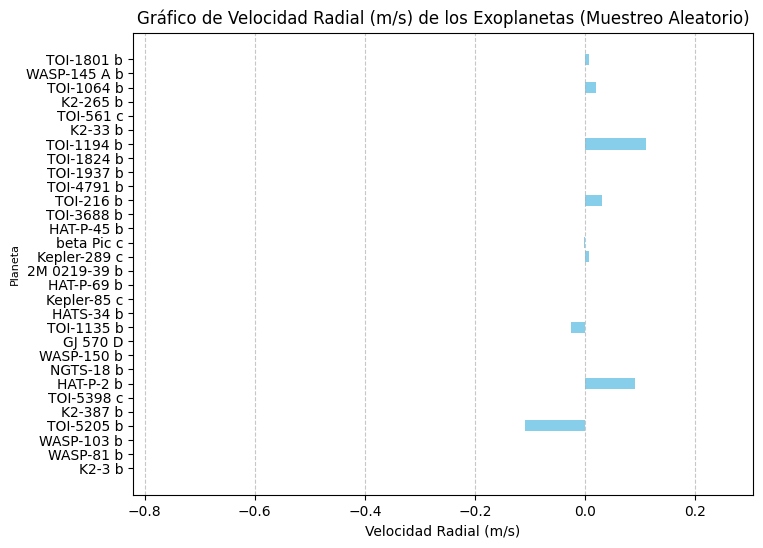

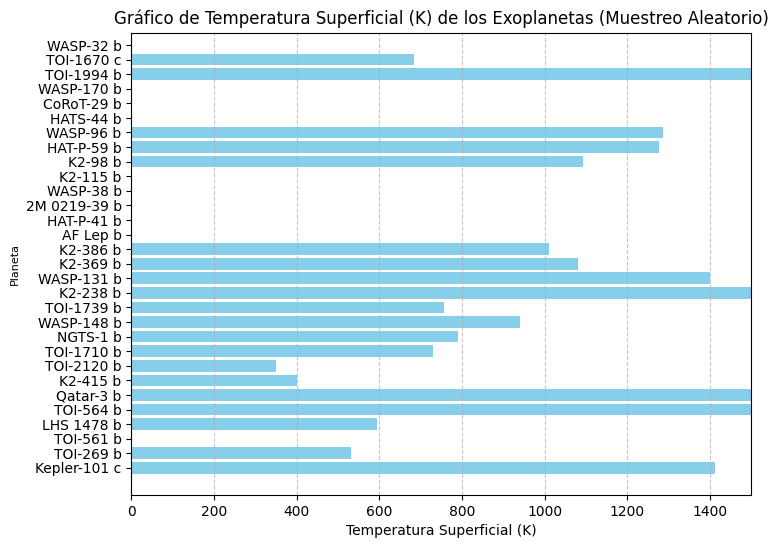

In [42]:
def cargar_datos(sistema, label_status):
    filename = filedialog.askopenfilename(filetypes=[("Archivo CSV", "*.csv")])
    if filename:
        try:
            file_size = os.path.getsize(filename)
            size_limit = 1 * 1024 * 1024 * 1024
            if file_size > size_limit:
                label_status.config(text="El archivo es demasiado grande.", fg="red")
                messagebox.showwarning("Archivo grande", "El archivo seleccionado supera el límite de tamaño de 1 GB.")
                num_rows = simpledialog.askinteger("Tamaño del archivo", "El archivo es demasiado grande. Ingrese el número de filas a cargar:")
                if num_rows is None:
                    return
                data = pd.read_csv(filename, nrows=num_rows)
            else:
                data = pd.read_csv(filename)

            data.replace("0", np.nan, inplace=True)

            # Filtra los datos para planetas con toda la información necesaria
            filtered_data = data.dropna(subset=['name', 'mass', 'radius', 'semi_major_axis', 'star_mass'])

            # Crea una lista de instancias de Planeta
            for _, row in filtered_data.iterrows():
                planeta = Planeta(
                    nombre=row['name'],
                    anfitriona=row['star_name'],
                    masa_planeta=row['mass'] * 1.898e27,  # Convertir a kg si está en masas de Júpiter
                    radio_planeta=row['radius'],
                    a=row['semi_major_axis'] * 1.496e11,  # Convertir a metros si está en UA
                    i=row['inclination'] if not np.isnan(row['inclination']) else 0,
                    e=row['eccentricity'] if not np.isnan(row['eccentricity']) else 0,
                    w=row['omega'] if not np.isnan(row['omega']) else 0,
                    masa_estrella=row['star_mass'],
                    temp_calculated=row['temp_calculated']
                )
                sistema.agregar_planeta(planeta)
            label_status.config(text="Datos cargados exitosamente!", fg="green")
        except Exception as e:
            label_status.config(text="No se pudieron cargar los datos :(", fg="red")
            messagebox.showerror("Error", f"Error al cargar y procesar datos: {e}")

def cargar_datos_thread(sistema, label_status):
    threading.Thread(target=cargar_datos, args=(sistema, label_status)).start()

def actualizar_label_datos_graficando(label_datos_graficando, variable_seleccion):
    texto = f"Graficando datos: {variable_seleccion.get()}"
    label_datos_graficando.config(text=texto)

def graficar_en_ventana(sistema, variable_seleccion, label_datos_graficando):
    ventana_grafico = tk.Toplevel(root)
    ventana_grafico.title("Gráfico de Exoplanetas")
    ventana_grafico.geometry("800x600")

    planetas_ordenados = []
    valores = []

    if variable_seleccion.get() == "Velocidad Radial":
        planetas_ordenados = sorted(sistema.planetas, key=lambda x: x.velocidad_radial(0, 0, 0))  # Usamos valores temporales de t, P, K
        xlabel = 'Velocidad Radial (m/s)'
        # Calculamos t, P, K para todos los planetas
        for planeta in planetas_ordenados:
            P = planeta.periodo_orbital()
            K = planeta.calcular_K(P)
            valores.append(planeta.velocidad_radial(0, P, K))  # Usamos t = 0
    elif variable_seleccion.get() == "Temperatura Superficial":
        planetas_ordenados = sorted(sistema.planetas, key=lambda x: x.temp_calculated)
        xlabel = 'Temperatura Superficial (K)'
        valores = [planeta.temp_calculated for planeta in planetas_ordenados]

    nombres = [planeta.nombre for planeta in planetas_ordenados]
    muestra_indices = random.sample(range(len(nombres)), min(30, len(nombres)))
    nombres_muestreados = [nombres[i] for i in muestra_indices]
    valores_muestreados = [valores[i] for i in muestra_indices]

    x_min = min(valores)
    x_max = max(valores)
    if np.isnan(x_min) or np.isinf(x_min):
        x_min = 0  # Establecer un valor predeterminado en caso de valores no válidos
    if np.isnan(x_max) or np.isinf(x_max):
        x_max = 1500
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.barh(nombres_muestreados, valores_muestreados, color='skyblue')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Planeta', fontsize=8)
    ax.set_title(f'Gráfico de {xlabel} de los Exoplanetas (Muestreo Aleatorio)')
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.set_xlim([x_min, x_max])

    canvas = FigureCanvasTkAgg(fig, master=ventana_grafico)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)




def graficar_en_ventana_thread(sistema, variable_seleccion, label_datos_graficando):
    actualizar_label_datos_graficando(label_datos_graficando, variable_seleccion)
    threading.Thread(target=graficar_en_ventana, args=(sistema, variable_seleccion, label_datos_graficando)).start()

root = tk.Tk()
root.title("Exoplanetarium")
root.geometry("1080x720")
root.configure(bg="gray26")

texto_introduccion = ("Este programa adquiere datos de exoplanetas que el usuario proporcionará. "
                      "Luego, procesa y representa estos datos en diferentes gráficos, elegidos por el usuario. "
                      "Su función principal es generar gráficos detallados, incluyendo velocidad radial, "
                      "mapas de temperaturas, y diagramas Hertzsprung-Russell (H-R). "
                      "¡Únete a nosotros en este viaje hacia el fascinante mundo de los exoplanetas, "
                      "donde la ciencia y la visualización de datos nos llevan a explorar los misterios del cosmos!")

label_introduccion = tk.Label(root, text=texto_introduccion, wraplength=600, justify="center", 
                              font=("Times New Roman", 16), fg="black", bg="grey", padx=10, pady=10)
label_introduccion.pack()

sistema = Sistema_Planetario()

button_cargar = tk.Button(root, text="Cargar Datos", command=lambda: cargar_datos_thread(sistema, label_status))
button_cargar.pack(pady=10)

label_status = tk.Label(root, text="", font=("Times New Roman", 14), bg="gray26")
label_status.pack(pady=5)

label_opciones = tk.Label(root, text="Datos a graficar:", font=("Times New Roman", 14), bg="gray26", fg="white")
label_opciones.pack(pady=5)

opciones = ["Velocidad Radial", "Temperatura Superficial"]
variable_seleccion = tk.StringVar(root)
variable_seleccion.set(opciones[0])

menu_opciones = tk.OptionMenu(root, variable_seleccion, *opciones)
menu_opciones.pack(pady=10)

label_datos_graficando = tk.Label(root, text="", font=("Times New Roman", 14), bg="gray26", fg="white")
label_datos_graficando.pack(pady=5)

button_graficar = tk.Button(root, text="Graficar", command=lambda: graficar_en_ventana_thread(sistema, variable_seleccion, label_datos_graficando))
button_graficar.pack(pady=10)

sistema = Sistema_Planetario()

root.mainloop()
if hasattr(root, 'destroy'):
    root.destroy()
